# Car configurator and its class diagram

Marta Vohnoutova

In [272]:
import iplantuml

## Konfigurátor aut - Škoda
Každý výrobce aut má jinou logiku konfiguráoru aut. Řešíme Škodovku

Třída Moje_konfigurace, kam budeme postupně konfigurovat své auto

Třída Typ_auta

Třída Model

Barva 
    Uni barvy
    Metalické barvy

Kola

Design interiéru

Třída Add_on

    Akční pakety
        Asistovaná jízda
        Elektricky ovládaná sedadla
        Infopayment
        Klima pakez
        Komfort paket
        Sport vs. family paket
        LED paket
        Park paket - kamery
        Alarm
        Boční airbagy
        posuvná střecha
        Tepelné čerpadlo
        Tažné zařízení základ vs. advanced
        Síťová stěna
        Koberec
     Příslušenství
        mnoho věcí ....
     Nabíjení
     
   
Testovací jízda   
        

Třída Add_on dovolí doplnit některé detaily podle typu auta a hlavně zvoleného modelu. Co povolí bude závislé na Modelu. Pokud budeme chtít něco, co zvolený Model nepovoluje, budeme muset zvolit jiný model.



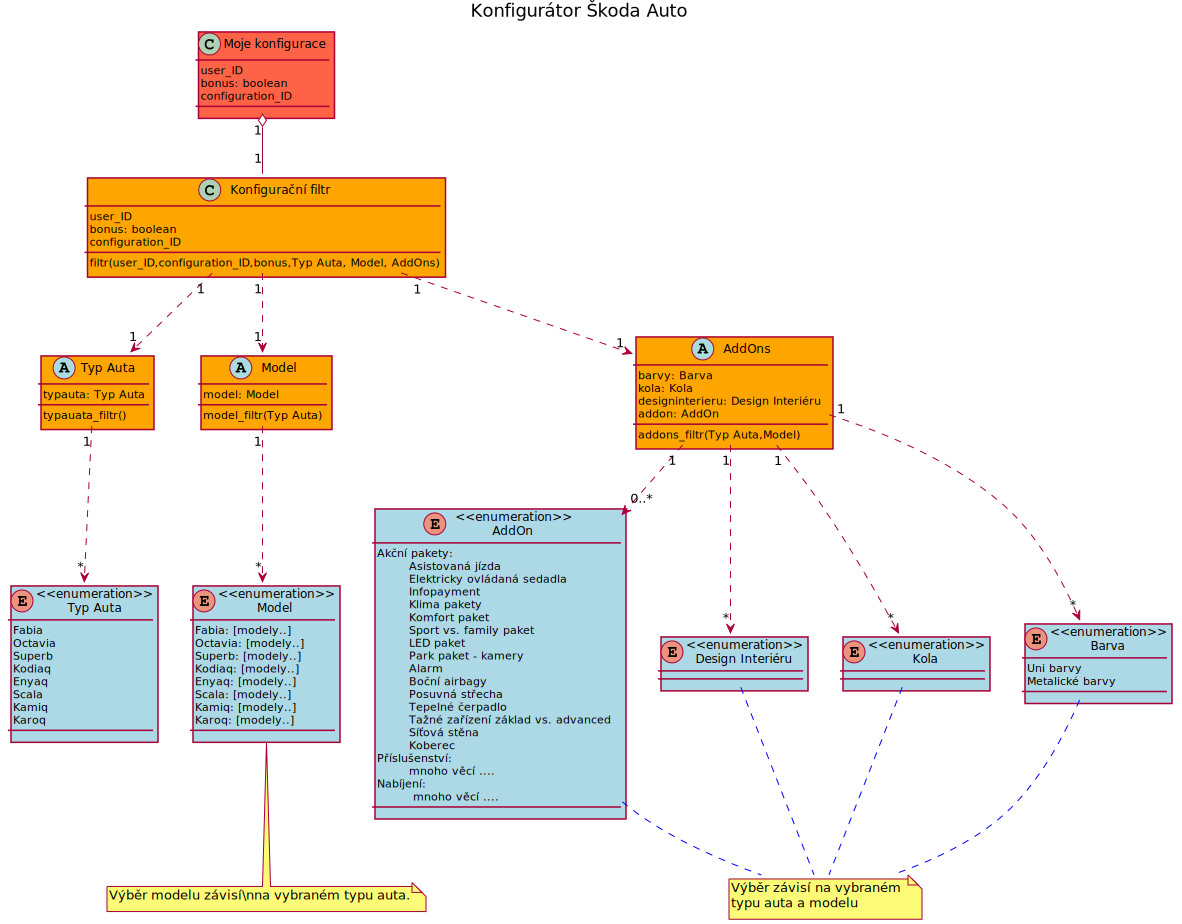

In [366]:
%%plantuml

@startuml

title: Konfigurátor Škoda Auto
    
class "Moje konfigurace" #Tomato {
    user_ID
    bonus: boolean
    configuration_ID    
}  

class "Konfigurační filtr" #Orange {
    user_ID
    bonus: boolean
    configuration_ID
       
    filtr(user_ID,configuration_ID,bonus,Typ Auta, Model, AddOns)
}

Abstract class "Typ Auta" #Orange {
    typauta: Typ Auta
    typauata_filtr()
}

enum "<<enumeration>>\nTyp Auta" #LightBlue {
    Fabia
    Octavia
    Superb
    Kodiaq
    Enyaq
    Scala
    Kamiq
    Karoq
}

Abstract class "Model" #Orange {
    model: Model
    model_filtr(Typ Auta)
}

enum "<<enumeration>>\nModel" #LightBlue {
    Fabia: [modely..]
    Octavia: [modely..]
    Superb: [modely..]
    Kodiaq: [modely..]
    Enyaq: [modely..]
    Scala: [modely..]
    Kamiq: [modely..]
    Karoq: [modely..]
}

Abstract class "AddOns" #Orange {
    barvy: Barva
    kola: Kola
    designinterieru: Design Interiéru
    addon: AddOn
    addons_filtr(Typ Auta,Model)
    
}

enum "<<enumeration>>\nBarva" #LightBlue {
    Uni barvy
    Metalické barvy 
}

enum "<<enumeration>>\nKola" #LightBlue {
}

enum "<<enumeration>>\nDesign Interiéru" #LightBlue {
}

enum "<<enumeration>>\nAddOn" #LightBlue {
    Akční pakety: 
        \tAsistovaná jízda
        \tElektricky ovládaná sedadla
        \tInfopayment
        \tKlima pakety
        \tKomfort paket
        \tSport vs. family paket
        \tLED paket
        \tPark paket - kamery
        \tAlarm
        \tBoční airbagy
        \tPosuvná střecha
        \tTepelné čerpadlo
        \tTažné zařízení základ vs. advanced
        \tSíťová stěna
        \tKoberec
    Příslušenství:
        \tmnoho věcí ....
    Nabíjení:
       \t mnoho věcí ....
}

' relace
"Konfigurační filtr" "1" -u-o "1" "Moje konfigurace"

"Konfigurační filtr" "1" ..> "1" "Typ Auta"
"Konfigurační filtr" "1" ..> "1" "Model"
"Konfigurační filtr" "1" ..> "1" "AddOns"


"Typ Auta" "1" ..> "*" "<<enumeration>>\nTyp Auta"
"Model" "1" ..> "*" "<<enumeration>>\nModel"
"AddOns" "1" ..> "*" "<<enumeration>>\nBarva"
"AddOns" "1"  ..> "*" "<<enumeration>>\nKola"
"AddOns" "1"  ..> "*" "<<enumeration>>\nDesign Interiéru"
"AddOns" "1"  ..> "0..*" "<<enumeration>>\nAddOn"


' poznámky
note as N1
    Výběr modelu závisí\nna vybraném typu auta.
end note
N1 .u. "<<enumeration>>\nModel" #Blue

note as N2 
    Výběr závisí na vybraném 
    typu auta a modelu
end note

N2 .u. "<<enumeration>>\nBarva" #Blue
N2 .u. "<<enumeration>>\nKola" #Blue
N2 .u. "<<enumeration>>\nDesign Interiéru" #Blue
N2 .u. "<<enumeration>>\nAddOn" #Blue 

@enduml

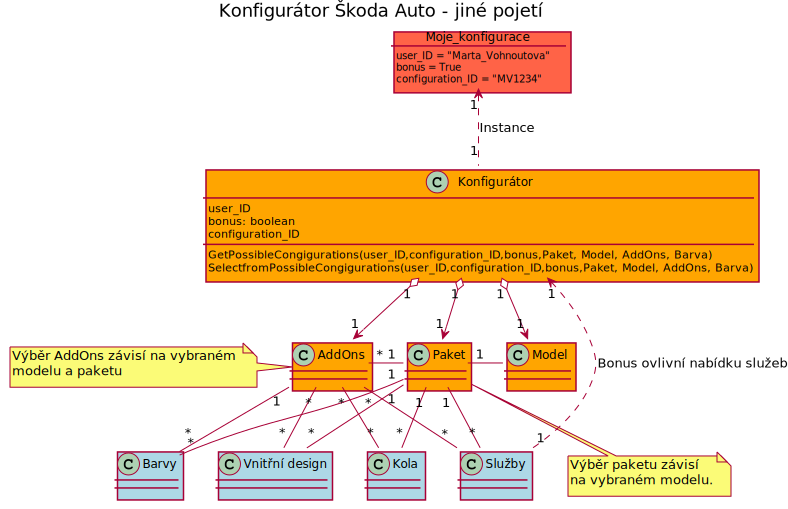

In [439]:
%%plantuml

@startuml

title: Konfigurátor Škoda Auto - jiné pojetí

object Moje_konfigurace #Tomato {
    user_ID = "Marta_Vohnoutova"
    bonus = True
    configuration_ID = "MV1234"   
}  

class "Konfigurátor" #Orange {
    user_ID
    bonus: boolean
    configuration_ID
       
    GetPossibleCongigurations(user_ID,configuration_ID,bonus,Paket, Model, AddOns, Barva)
    SelectfromPossibleCongigurations(user_ID,configuration_ID,bonus,Paket, Model, AddOns, Barva)
}

class "Model" #Orange {}
class "Paket" #Orange {}
class "AddOns" #Orange {}
class "Barvy" #LightBlue {}
class "Služby" #LightBlue {}
class "Vnitřní design" #LightBlue {}
class "Kola" #LightBlue {}

' relace
Moje_konfigurace "1" <.d. "1" "Konfigurátor" : Instance

"Konfigurátor" "1" o-d-> "1" "Model"
"Konfigurátor" "1" o-d-> "1" "Paket"
"Konfigurátor" "1" o-d-> "1" "AddOns"
"Konfigurátor" "1" <.d. "1" "Služby": Bonus ovlivní nabídku služeb

"Paket" "1" -l- "*" "AddOns"
"Model" -l- "1" "Paket"

"Paket" "1" -- "*" "Barvy"
"AddOns" "1" -- "*" "Barvy"
"Paket" "1" -- "*" "Služby"
"AddOns" "*" -- "*" "Služby"
"Paket" "1" -- "*" "Vnitřní design"
"AddOns" "*" -- "*" "Vnitřní design"
"Paket" "1" -- "*" "Kola"
"AddOns" "*" -- "*" "Kola"

' poznámky
note as N1
    Výběr paketu závisí
    na vybraném modelu.
end note
N1 .u. "Paket" #Blue

note as N2 
    Výběr AddOns závisí na vybraném 
    modelu a paketu
end note

N2 .r. "AddOns" #Blue 


@enduml

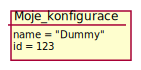

In [401]:
%%plantuml

@startuml

object Moje_konfigurace {
  name = "Dummy"
  id = 123
}

@enduml

In [440]:
! python -m plantuml /home/marta/UML/configurator_new.txt  # zapíšeme jako obrázek

[{'filename': '/home/marta/UML/configurator_new.txt', 'gen_success': True}]


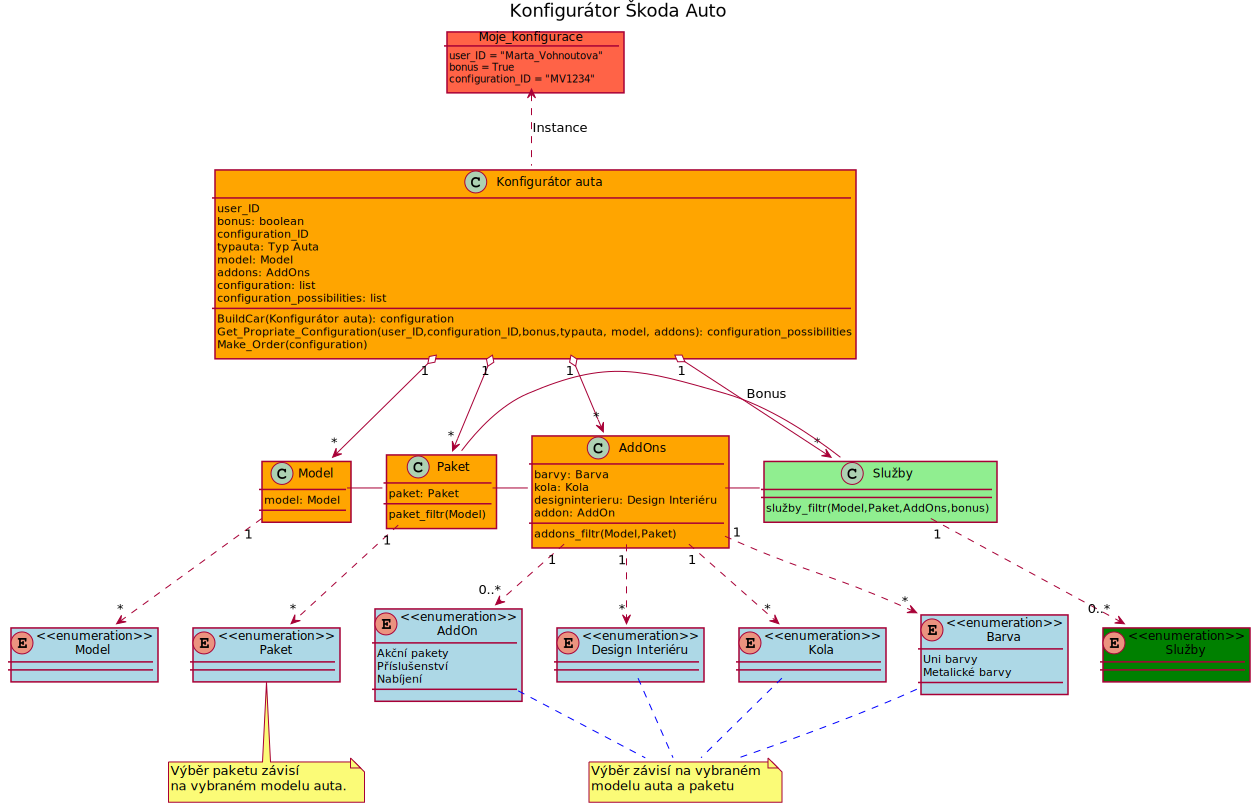

In [457]:
%%plantuml

@startuml
' !theme toy
title: Konfigurátor Škoda Auto
    

object Moje_konfigurace #Tomato {
    user_ID = "Marta_Vohnoutova"
    bonus = True
    configuration_ID = "MV1234"   
}  

    
class "Konfigurátor auta" #Orange {
    user_ID
    bonus: boolean
    configuration_ID 
    typauta: Typ Auta
    model: Model
    addons: AddOns
    configuration: list
    configuration_possibilities: list
    BuildCar(Konfigurátor auta): configuration    
    Get_Propriate_Configuration(user_ID,configuration_ID,bonus,typauta, model, addons): configuration_possibilities
    Make_Order(configuration)
}  

class "Model" #Orange {
    model: Model    
}

enum "<<enumeration>>\nModel" #LightBlue {
  
}

class "Paket" #Orange {
    paket: Paket
    paket_filtr(Model)
}

enum "<<enumeration>>\nPaket" #LightBlue {

}

class "AddOns" #Orange {
    barvy: Barva
    kola: Kola
    designinterieru: Design Interiéru
    addon: AddOn
    addons_filtr(Model,Paket)   
}

class "Služby" #LightGreen {
    služby_filtr(Model,Paket,AddOns,bonus)
   }

enum "<<enumeration>>\nSlužby" #Green {
}
enum "<<enumeration>>\nBarva" #LightBlue {
    Uni barvy
    Metalické barvy 
}

enum "<<enumeration>>\nKola" #LightBlue {
}

enum "<<enumeration>>\nDesign Interiéru" #LightBlue {
}

enum "<<enumeration>>\nAddOn" #LightBlue {
    Akční pakety       
    Příslušenství 
    Nabíjení
}

' relace
Moje_konfigurace <.d. "Konfigurátor auta" : Instance

"Konfigurátor auta"  "1" o--> "*" "Model"
"Konfigurátor auta"  "1" o--> "*" "Paket"
"Konfigurátor auta"  "1" o--> "*" "AddOns"
"Konfigurátor auta"  "1" o--> "*" "Služby" : Bonus

"Model"   -r-  "Paket"
"Paket"   -r-  "AddOns"
"Paket"   -r-  "Služby"
"AddOns"   -r-  "Služby"

"Model" "1" ..> "*" "<<enumeration>>\nModel"
"Paket" "1" ..> "*" "<<enumeration>>\nPaket"
"AddOns" "1" ..> "*" "<<enumeration>>\nBarva"
"AddOns" "1"  ..> "*" "<<enumeration>>\nKola"
"AddOns" "1"  ..> "*" "<<enumeration>>\nDesign Interiéru"
"AddOns" "1"  ..> "0..*" "<<enumeration>>\nAddOn"
"Služby" "1"  ..> "0..*" "<<enumeration>>\nSlužby"


' poznámky
note as N1
    Výběr paketu závisí
    na vybraném modelu auta.
end note
N1 .u. "<<enumeration>>\nPaket" #Blue

note as N2 
    Výběr závisí na vybraném 
    modelu auta a paketu
end note

N2 .u. "<<enumeration>>\nBarva" #Blue
N2 .u. "<<enumeration>>\nKola" #Blue
N2 .u. "<<enumeration>>\nDesign Interiéru" #Blue
N2 .u. "<<enumeration>>\nAddOn" #Blue 

@enduml

In [369]:
! python -m plantuml /home/marta/UML/configurator_simple.txt  # zapíšeme jako obrázek

[{'filename': '/home/marta/UML/configurator_simple.txt', 'gen_success': True}]
